In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
spotify_file = "Resources\spotify_clean.csv"
spotify_df = pd.read_csv(spotify_file)
spotify_df.head()

,track_name,album_popularity,artist_name,artist_followers,artist_popularity,artist_genres,rank,week,danceability,energy,acousticness,liveness,tempo,duration,streams,genre_category
0,Starboy,0,The Weeknd,51215861,94,"canadian contemporary r&b, canadian pop, pop",1,1/6/2017,0.681,0.594,0.1650,0.134,186.054,230453,25734078,International
1,Closer,71,The Chainsmokers,19562506,81,"dance pop, edm, electropop, pop, pop dance, tr...",2,1/6/2017,0.748,0.524,0.4140,0.111,95.010,244960,23519705,Dance
2,Rockabye (feat. Sean Paul & Anne-Marie),62,Clean Bandit,4943046,76,"dance pop, edm, pop, pop dance, post-teen pop,...",3,1/6/2017,0.720,0.763,0.4060,0.180,101.965,251088,21216399,Dance
3,Let Me Love You,0,DJ Snake,8137850,78,"dance pop, edm, electronic trap, pop, pop danc...",4,1/6/2017,0.476,0.718,0.0784,0.122,199.864,205946,19852704,Dance
4,I Don’t Wanna Live Forever (Fifty Shades Darke...,0,ZAYN,21433236,77,"dance pop, pop, post-teen pop, uk pop",5,1/6/2017,0.735,0.451,0.0631,0.325,117.973,245200,18316326,Dance


In [24]:
#x_axis = np.arange(len(spotify_df))
#tick_locations = [value + 1 for value in x_axis]
spotify_df.sort_values(["artist_followers"])

,track_name,album_popularity,artist_name,artist_followers,artist_popularity,artist_genres,rank,week,danceability,energy,acousticness,liveness,tempo,duration,streams,genre_category
9287,Jingle Bell Rock,0,Anita Kerr Singers,3230,30,easy listening,108,12/8/2017,0.741,0.326,0.918,0.0658,120.992,130266,5464411,Other
9467,Jingle Bell Rock,0,Anita Kerr Singers,3230,30,easy listening,88,12/15/2017,0.741,0.326,0.918,0.0658,120.992,130266,6194483,Other
9158,Jingle Bell Rock,0,Anita Kerr Singers,3230,30,easy listening,179,12/1/2017,0.741,0.326,0.918,0.0658,120.992,130266,3546967,Other
9775,Carol of the Bells,53,Mykola Dmytrovych Leontovych,3300,44,"post-romantic era, ukrainian classical",197,12/22/2017,0.418,0.106,0.994,0.1790,46.718,85266,4122650,Other
9881,Carol of the Bells,53,Mykola Dmytrovych Leontovych,3300,44,"post-romantic era, ukrainian classical",104,12/29/2017,0.418,0.106,0.994,0.1790,46.718,85266,5979609,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27347,Photograph,61,Ed Sheeran,104059839,90,"pop, uk pop",192,8/30/2019,0.614,0.379,0.607,0.0986,107.989,258986,4404628,International
19138,Thinking out Loud,61,Ed Sheeran,104059839,90,"pop, uk pop",170,11/16/2018,0.781,0.445,0.474,0.1840,78.998,281560,4625597,International
43667,Afterglow,63,Ed Sheeran,104059839,90,"pop, uk pop",134,4/2/2021,0.641,0.324,0.698,0.3280,110.184,185486,5945567,International
43048,Perfect,84,Ed Sheeran,104059839,90,"pop, uk pop",115,3/12/2021,0.599,0.448,0.163,0.1060,95.050,263400,6296246,International


In [41]:
# set the index to the artist's name
pop_data = spotify_df.set_index('artist_name')
pop_data.head()



,track_name,album_popularity,artist_followers,artist_popularity,artist_genres,rank,week,danceability,energy,acousticness,liveness,tempo,duration,streams,genre_category
artist_name,,,,,,,,,,,,,,,
The Weeknd,Starboy,0,51215861,94,"canadian contemporary r&b, canadian pop, pop",1,1/6/2017,0.681,0.594,0.1650,0.134,186.054,230453,25734078,International
The Chainsmokers,Closer,71,19562506,81,"dance pop, edm, electropop, pop, pop dance, tr...",2,1/6/2017,0.748,0.524,0.4140,0.111,95.010,244960,23519705,Dance
Clean Bandit,Rockabye (feat. Sean Paul & Anne-Marie),62,4943046,76,"dance pop, edm, pop, pop dance, post-teen pop,...",3,1/6/2017,0.720,0.763,0.4060,0.180,101.965,251088,21216399,Dance
DJ Snake,Let Me Love You,0,8137850,78,"dance pop, edm, electronic trap, pop, pop danc...",4,1/6/2017,0.476,0.718,0.0784,0.122,199.864,205946,19852704,Dance
ZAYN,I Don’t Wanna Live Forever (Fifty Shades Darke...,0,21433236,77,"dance pop, pop, post-teen pop, uk pop",5,1/6/2017,0.735,0.451,0.0631,0.325,117.973,245200,18316326,Dance


In [52]:
pop_data_t = pop_data.groupby(["track_name"])
song_streams_df = pop_data_t.mean()[["streams"]]
song_tempo_df = pop_data_t.mean()[["tempo"]]
#print(song_streams_df.head(100))
song_tempo_df.head

<bound method NDFrame.head of                                    tempo
track_name                              
!                             119.961000
#AD?                          175.896000
$$$ - with Matt Ox            140.067000
'Till I Collapse              171.412333
...Ready For It?              160.035684
...                                  ...
you broke me first            124.148000
you should see me in a crown  130.543824
Échame La Culpa                96.015400
‘tis the damn season          145.910000
美女と野獣                          81.353000

[3500 rows x 1 columns]>

In [54]:
mergetempo_streams_df = pd.merge(song_streams_df, song_tempo_df, on = "track_name", how = "left")
mergetempo_streams_df

,streams,tempo
track_name,,
!,4.401357e+06,119.961000
#AD?,4.822940e+06,175.896000
$$$ - with Matt Ox,6.443057e+06,140.067000
'Till I Collapse,3.431727e+06,171.412333
...Ready For It?,7.162460e+06,160.035684
...,...,...
you broke me first,1.325830e+07,124.148000
you should see me in a crown,6.518611e+06,130.543824
Échame La Culpa,1.137686e+07,96.015400


Make a scatterplot of Artist Followers vs Tempo 

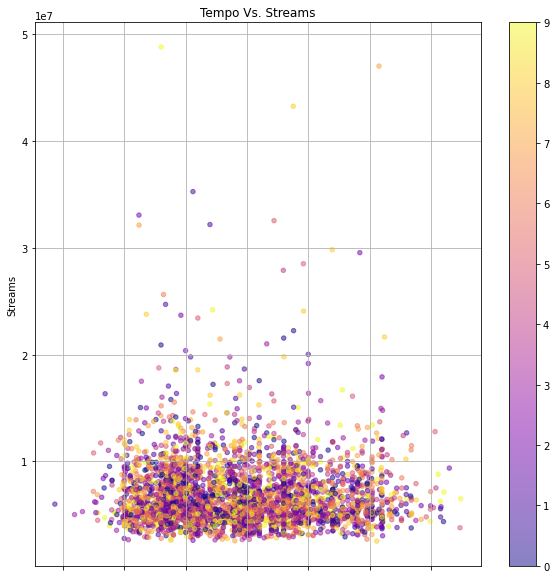

In [61]:
colors = np.random.randint(10, size= (3500))



mergetempo_streams_df.plot(kind="scatter", x="tempo", y="streams", c=colors, alpha=0.5, grid=True, figsize=(10,10),
title="Tempo Vs. Streams", xlabel = "Tempo", ylabel = "Streams", colormap ='plasma')

plt.show()


In [62]:
pop_data_t = pop_data.groupby(["track_name"])
song_streams_df = pop_data_t.mean()[["streams"]]
song_duration_df = pop_data_t.mean()[["duration"]]
song_duration_df

,duration
track_name,
!,135338.000000
#AD?,161748.000000
$$$ - with Matt Ox,130403.000000
'Till I Collapse,297889.037037
...Ready For It?,208194.210526
...,...
you broke me first,169265.000000
you should see me in a crown,180849.823529
Échame La Culpa,173720.000000


In [63]:
mergeduration_streams_df = pd.merge(song_streams_df, song_duration_df, on = "track_name", how = "left")
mergeduration_streams_df

,streams,duration
track_name,,
!,4.401357e+06,135338.000000
#AD?,4.822940e+06,161748.000000
$$$ - with Matt Ox,6.443057e+06,130403.000000
'Till I Collapse,3.431727e+06,297889.037037
...Ready For It?,7.162460e+06,208194.210526
...,...,...
you broke me first,1.325830e+07,169265.000000
you should see me in a crown,6.518611e+06,180849.823529
Échame La Culpa,1.137686e+07,173720.000000


<AxesSubplot:title={'center':'Duration Vs. Streams'}, xlabel='Song Duration', ylabel='Streams'>

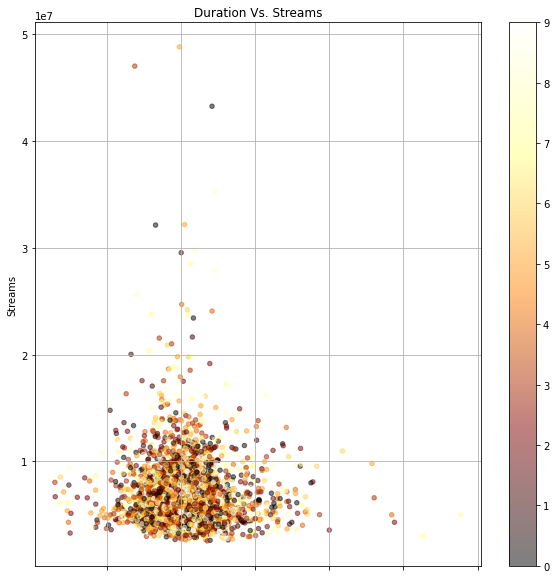

In [66]:
colors = np.random.randint(10, size= (3500))



mergeduration_streams_df.plot(kind="scatter", x="duration", y="streams", c=colors, alpha=0.5, grid=True, figsize=(10,10), title="Duration Vs. Streams", xlabel = "Song Duration", ylabel = "Streams", colormap = "afmhot")

#pop_data.plot(kind="scatter", x="artist_followers", y="duration", c=colors, alpha=0.5, grid=True, figsize=(15,15),
              #title="Followers Vs. Song Duration", xlabel = "Number of Followers", ylabel = "Song Duration", colormap ='afmhot')

In [71]:
song_acousticness_df = pop_data_t.mean()[["acousticness"]]
mergeacoustic_streams_df = pd.merge(song_streams_df, song_acousticness_df, on = "track_name", how = "left")
mergeacoustic_streams_df


,streams,acousticness
track_name,,
!,4.401357e+06,0.029600
#AD?,4.822940e+06,0.131000
$$$ - with Matt Ox,6.443057e+06,0.063600
'Till I Collapse,3.431727e+06,0.074333
...Ready For It?,7.162460e+06,0.056332
...,...,...
you broke me first,1.325830e+07,0.785000
you should see me in a crown,6.518611e+06,0.466500
Échame La Culpa,1.137686e+07,0.033280


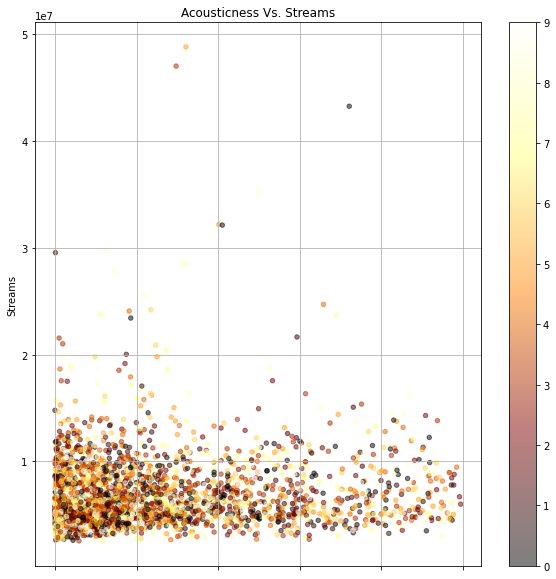

In [72]:
#colors = np.random.randint(10, size=(44134))

#pop_data.plot(kind="scatter", x="acousticness", y="streams", c=colors, alpha=0.5, grid=True, figsize=(15,15),
              #title="Acousticness Vs. Streams ", xlabel = "Acousticness", ylabel = "Streams", colormap ='summer')

mergeacoustic_streams_df.plot(kind="scatter", x="acousticness", y="streams", c=colors, alpha=0.5, grid=True, figsize=(10,10), title="Acousticness Vs. Streams", xlabel = "Song Acousticness", ylabel = "Streams", colormap = "afmhot")

plt.show()

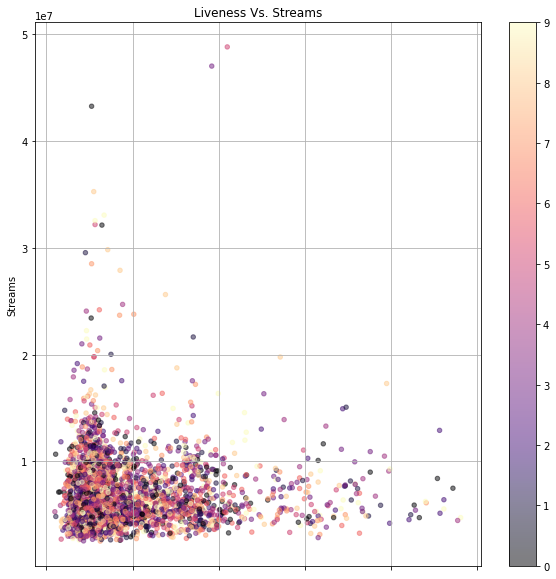

In [73]:
song_liveness_df = pop_data_t.mean()[["liveness"]]
mergeliveness_streams_df = pd.merge(song_streams_df, song_liveness_df, on = "track_name", how = "left")


mergeliveness_streams_df.plot(kind="scatter", x="liveness", y="streams", c=colors, alpha=0.5, grid=True, figsize=(10,10), title="Liveness Vs. Streams", xlabel = "Liveness", ylabel = "Streams", colormap = "magma")

plt.show()

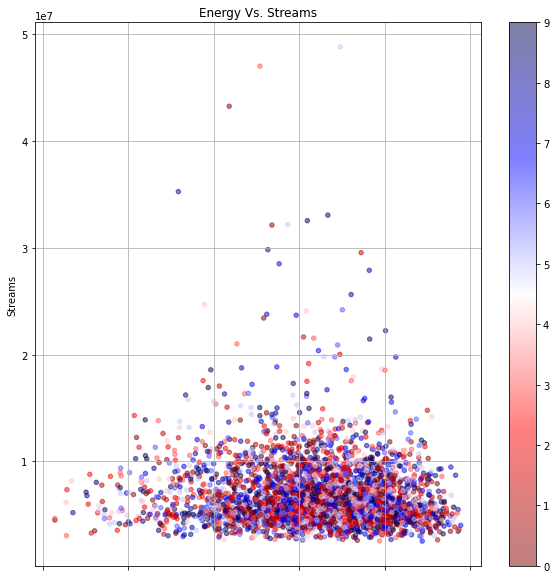

In [74]:
song_energy_df = pop_data_t.mean()[["energy"]]
mergeenergy_streams_df = pd.merge(song_streams_df, song_energy_df, on = "track_name", how = "left")


mergeenergy_streams_df.plot(kind="scatter", x="energy", y="streams", c=colors, alpha=0.5, grid=True, figsize=(10,10), title="Energy Vs. Streams", xlabel = "Energy", ylabel = "Streams", colormap = "seismic_r")

plt.show()



#pop_data.plot(kind="scatter", x="energy", y="streams", c=colors, alpha=0.5, grid=True, figsize=(15,15),
              #title="Energy Vs. Streams ", xlabel = "Energy", ylabel = "Streams", colormap ='seismic_r')

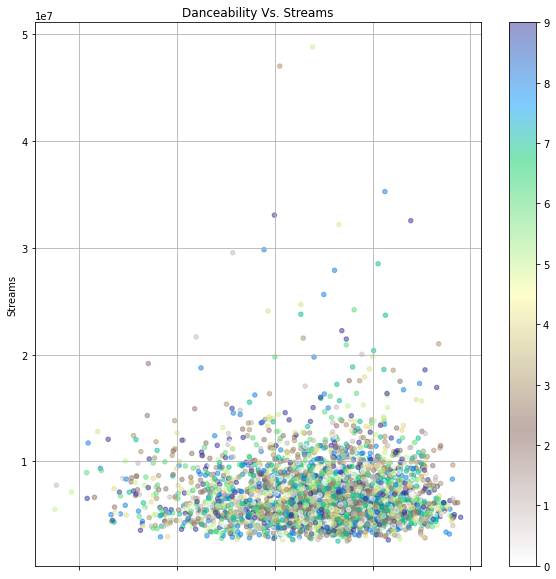

In [76]:
song_danceability_df = pop_data_t.mean()[["danceability"]]
mergedance_streams_df = pd.merge(song_streams_df, song_danceability_df, on = "track_name", how = "left")


mergedance_streams_df.plot(kind="scatter", x="danceability", y="streams", c=colors, alpha=0.5, grid=True, figsize=(10,10), title="Danceability Vs. Streams", xlabel = "", ylabel = "Streams", colormap = "terrain_r")

plt.show()

#pop_data.plot(kind="scatter", x="danceability", y="streams", c=colors, alpha=0.5, grid=True, figsize=(15,15),
              #title="Danceability Vs. Streams ", xlabel = "Danceability", ylabel = "Streams", colormap ='terrain_r')

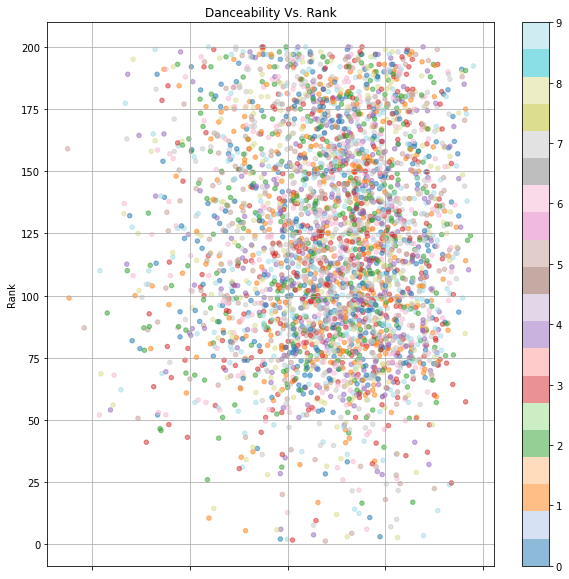

In [80]:
song_rank_df = pop_data_t.mean()[["rank"]]
mergedance_rank_df = pd.merge(song_rank_df, song_danceability_df, on = "track_name", how = "left")


mergedance_rank_df.plot(kind="scatter", x="danceability", y="rank", c=colors, alpha=0.5, grid=True, figsize=(10,10), title="Danceability Vs. Rank", xlabel = "Danceability", ylabel = "Rank", colormap = "tab20")
plt.show()


#pop_data.plot(kind="scatter", x="danceability", y="rank", c=colors, alpha=0.5, grid=True, figsize=(15,15),
              #title="Danceability Vs. Rank ", xlabel = "Danceability", ylabel = "Rank", colormap ='tab20')

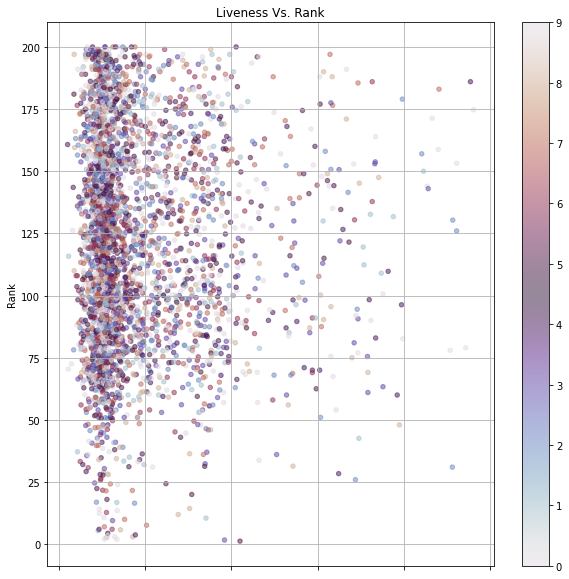

In [81]:
#pop_data.plot(kind="scatter", x="liveness", y="rank", c=colors, alpha=0.5, grid=True, figsize=(15,15),
              #title="Liveness Vs. Rank ", xlabel = "Liveness", ylabel = "Rank", colormap ='terrain_r')

mergelive_rank_df = pd.merge(song_rank_df, song_liveness_df, on = "track_name", how = "left")


mergelive_rank_df.plot(kind="scatter", x="liveness", y="rank", c=colors, alpha=0.5, grid=True, figsize=(10,10), title="Liveness Vs. Rank", xlabel = "Liveness", ylabel = "Rank", colormap = "twilight")
plt.show()

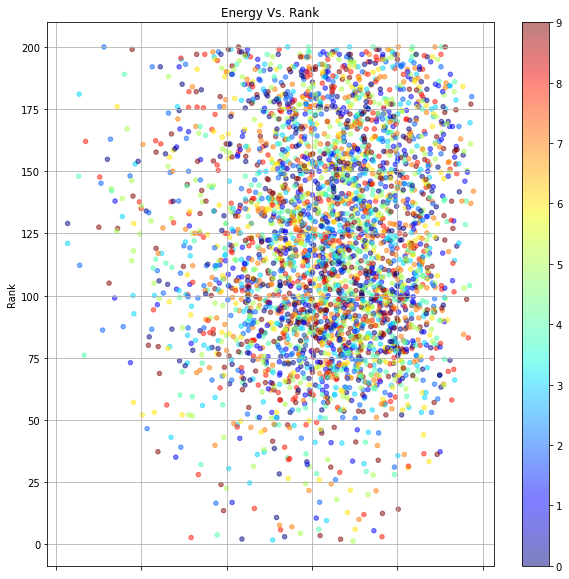

In [82]:
mergeenergy_rank_df = pd.merge(song_rank_df, song_energy_df, on = "track_name", how = "left")


mergeenergy_rank_df.plot(kind="scatter", x = "energy", y="rank", c=colors, alpha=0.5, grid=True, figsize=(10,10), title="Energy Vs. Rank", xlabel = "Energy", ylabel = "Rank", colormap = "jet")
plt.show()

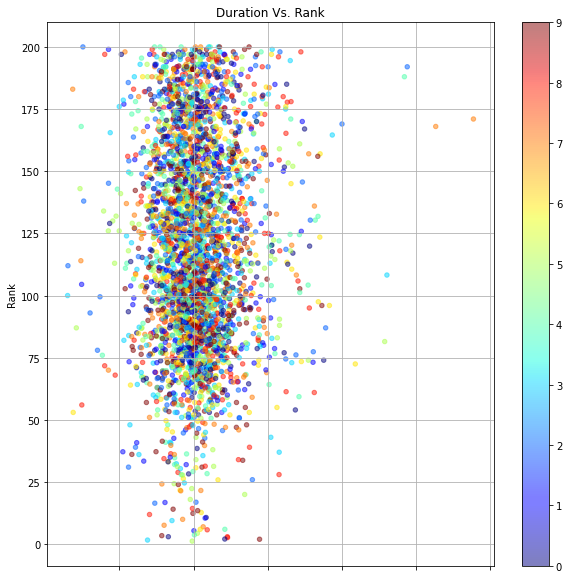

In [83]:
mergeduration_rank_df = pd.merge(song_rank_df, song_duration_df, on = "track_name", how = "left")


mergeduration_rank_df.plot(kind="scatter", x = "duration", y="rank", c=colors, alpha=0.5, grid=True, figsize=(10,10), title="Duration Vs. Rank", xlabel = "Duration", ylabel = "Rank", colormap = "jet")
plt.show()

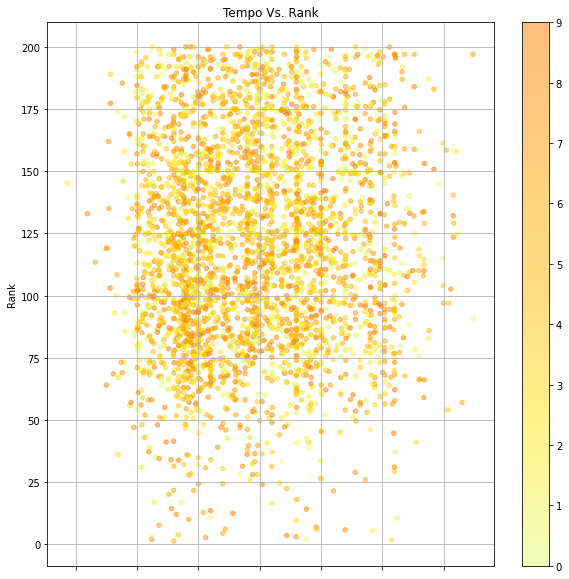

In [85]:
mergetempo_rank_df = pd.merge(song_rank_df, song_tempo_df, on = "track_name", how = "left")


mergetempo_rank_df.plot(kind="scatter", x = "tempo", y="rank", c=colors, alpha=0.5, grid=True, figsize=(10,10), title="Tempo Vs. Rank", xlabel = "Tempo", ylabel = "Rank", colormap = "Wistia")
plt.show()